# Calculating evaluation metrics with Python

In the past lectures, you saw how to evaluate a model based on quality metrics.

Let's see how we can calculate those metrics on a model with Python. To illustrate, let's train a logistic regression on the Iris dataset as you did in the Regression instruction.

First off, import the dataset and separate descriptive attributes from the target.

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

# prepare the data
iris = pd.read_csv(r"iris.csv")
X = iris.iloc[:,0:4]
y = iris.iloc[:,-1]
print(y.value_counts(normalize=True))

Iris-setosa        0.333333
Iris-versicolor    0.333333
Iris-virginica     0.333333
Name: Species, dtype: float64


Then, let's separate training and test data. We can do it with a `scikit-learn` function, `train_test_split`. This function will split _randomly_ the data in a training and test set, in a 70:30 proportion; the stratify parameter makes sure the classes are **balanced**.

In [2]:
from sklearn.model_selection import train_test_split
#split in a trainig and test set without stratify
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3)
print("without stratify: ")
print(train_y.value_counts(normalize=True))
print(test_y.value_counts(normalize=True))

print('-----------------------------------------------')
#split in a trainig and test set with stratify
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, stratify=y)
print("with stratify: ")
print(train_y.value_counts(normalize=True))
print(test_y.value_counts(normalize=True))

print('-----------------------------------------------')
print(train_X.shape)
print(test_X.shape)
print(train_y.shape)
print(test_y.shape)

without stratify: 
Iris-virginica     0.352381
Iris-setosa        0.323810
Iris-versicolor    0.323810
Name: Species, dtype: float64
Iris-versicolor    0.355556
Iris-setosa        0.355556
Iris-virginica     0.288889
Name: Species, dtype: float64
-----------------------------------------------
with stratify: 
Iris-setosa        0.333333
Iris-versicolor    0.333333
Iris-virginica     0.333333
Name: Species, dtype: float64
Iris-virginica     0.333333
Iris-setosa        0.333333
Iris-versicolor    0.333333
Name: Species, dtype: float64
-----------------------------------------------
(105, 4)
(45, 4)
(105,)
(45,)


Now, let's fit a logistic regression model to the training data...

In [3]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(max_iter=150)
classifier.fit(train_X, train_y)

LogisticRegression(max_iter=150)

...and predict the target value for the test data.

In [4]:
pred_y = classifier.predict(test_X)

At this point, we can calculate a confusion matrix for the real and predicted values of the test data target. It is very straightforward.

Notice that, since the split is random, it is not guaranteed that the confusion matrix will contain exactly the same values for each execution of this Jupyter Notebook.

In [5]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_y, pred_y)
print(cm)

[[15  0  0]
 [ 0 14  1]
 [ 0  0 15]]


...alright, maybe it IS straightforward, but it is not good-looking.

A better alternative is the `crosstab` function from Pandas:

In [6]:
import numpy as np
# the input of crosstab must be prepared
pred_y = np.array(pred_y)
true_y = np.array(test_y)

pd.crosstab(true_y, pred_y, rownames=['True'], colnames=['Predicted'], margins=True)


Predicted,Iris-setosa,Iris-versicolor,Iris-virginica,All
True,,,,
Iris-setosa,15,0,0,15
Iris-versicolor,0,14,1,15
Iris-virginica,0,0,15,15
All,15,14,16,45


We can calculate the common metrics of our classification as follows.

Notice that **precision**, **recall**, and **f1-measure** need an additional parameter. The default behavior works only for **binary** classification; for multiclass, we have to specify the aggregation function to be used as average.

Passing `None` we obtain the **class-wise** metrics. You can find the other options in the docs: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html

In [7]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
print("precision: ")
print(precision_score(true_y, pred_y, average=None))
print("recall: ")
print(recall_score(true_y, pred_y, average=None))
print("accuracy: ")
print(accuracy_score(true_y, pred_y))
print("f1_score: ")
print(f1_score(true_y, pred_y, average=None))

precision: 
[1.     1.     0.9375]
recall: 
[1.         0.93333333 1.        ]
accuracy: 
0.9777777777777777
f1_score: 
[1.         0.96551724 0.96774194]


To make this more automatic you can use `classification_report`: 

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

In [8]:
from sklearn.metrics import classification_report

print(classification_report(true_y, pred_y))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      0.93      0.97        15
 Iris-virginica       0.94      1.00      0.97        15

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



## Overfitting

You have seen the concept of _overfitting_ in the lectures. Let's see an example.
A cause of overfitting could be using too few examples to train a classifier. Let's see what happens if we split the training and test set improperly.

In [9]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

iris = pd.read_csv("iris.csv")
X = iris.iloc[:,0:4]
y = iris.iloc[:,-1]

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.95, stratify=y)

classifier = LogisticRegression()
classifier.fit(train_X, train_y)

pred_train_y = classifier.predict(train_X)
pred_test_y = classifier.predict(test_X)

import numpy as np
pred_train_y = np.array(pred_train_y)
true_train_y = np.array(train_y)
pred_test_y = np.array(pred_test_y)
true_test_y = np.array(test_y)

pd.crosstab(np.array(true_train_y), np.array(pred_train_y), rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,Iris-setosa,Iris-versicolor,Iris-virginica,All
True,,,,
Iris-setosa,2,0,0,2
Iris-versicolor,0,3,0,3
Iris-virginica,0,0,2,2
All,2,3,2,7


In [10]:
accuracy_score(true_train_y, pred_train_y)

1.0

In [11]:
pd.crosstab(np.array(true_test_y), np.array(pred_test_y), rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,Iris-setosa,Iris-versicolor,Iris-virginica,All
True,,,,
Iris-setosa,48,0,0,48
Iris-versicolor,0,47,0,47
Iris-virginica,0,24,24,48
All,48,71,24,143


In [12]:
accuracy_score(true_test_y, pred_test_y)

0.8321678321678322

## Binary classification case

In the case of binary classification, we can, of course, use the `sklearn.metrics.confusion_matrix` to get true/false positive/negative, flattening the matrix.
Let's do it again on the Iris dataset, but remove the instances with label _Iris-setosa_ to turn it into a binary classification problem.

In [13]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

iris = pd.read_csv(r"iris.csv")
# make it a binary problem
iris = iris.loc[iris['Species'] != 'Iris-setosa']
X = iris.iloc[:,0:4]
y = iris.iloc[:,-1]

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, stratify=y)



classifier = LogisticRegression()
classifier.fit(train_X, train_y)

pred_y = classifier.predict(test_X)

import numpy as np
pred_y = np.array(pred_y)
true_y = np.array(test_y)


cm = confusion_matrix(true_y, pred_y)
print(cm)
tn, fp, fn, tp = cm.ravel()
print(tn, fp, fn, tp)

[[14  1]
 [ 1 14]]
14 1 1 14


And we can calculate the common metrics as follows. In this case, we don't need to specify the aggregation function since the classification is binary (binary metrics are the default behavior). Since the labels are strings, we must, however, specify which label is the _positive_ and which is the _negative_.

In [14]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

print(precision_score(true_y, pred_y, pos_label='Iris-versicolor'))
print(recall_score(true_y, pred_y, pos_label='Iris-versicolor'))
print(accuracy_score(true_y, pred_y))
print(f1_score(true_y, pred_y, pos_label='Iris-versicolor'))

0.9333333333333333
0.9333333333333333
0.9333333333333333
0.9333333333333333


### ROC and AUC

When a binary classifier returns a probability estimate or a degree of belief for a certain class, we can plot the ROC curve you have seen in the lecture and then compute the AUC. Refer to the slides for the theory behind it; the only difference is that the Python implementation of the AUC score calculates the area with the trapezoidal rule rather than rectangles; the resulting AUC score is more precise, but the formula is more complex.

Note that the `auc` function we use is a generic function that can calculate the area under any curve, having the x and y points.
There is also a way to directly calculate the AUC from labels and probabilities with the `sklearn.metrics.roc_auc_score` function.

Resulting AUC: 0.9911111111111112


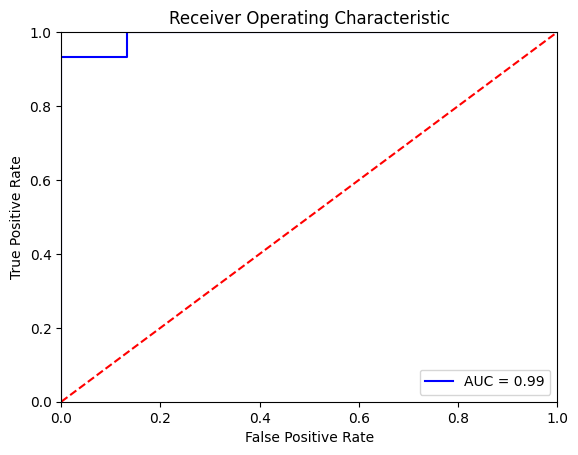

[0.         0.         0.         0.13333333 0.13333333 1.        ]
[0.         0.06666667 0.93333333 0.93333333 1.         1.        ]


In [15]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
# Calculate the false positive and true positive results to create below the curve
fpr, tpr, _ = roc_curve(true_y, classifier.predict_proba(test_X)[:,0], pos_label='Iris-versicolor')
#calculate the AUC
roc_auc = auc(fpr, tpr)
print('Resulting AUC:', roc_auc)
# plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print(fpr)
print(tpr)

### AUC calculation
The difference between the rectangle rule and the trapezoidal rule is shown below.

Rectangle rule: 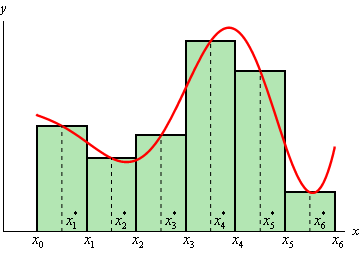

Trapezoidal rule: 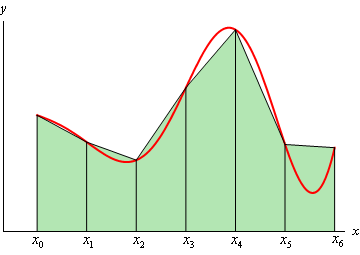

## Cross validation

Cross-validating a model with K-fold cross validation can be done through the `cross_val_score` of Sklearn. This method takes care of everything; you just have to specify the classifier, the training data, the labels, the metric to be evaluated, and the number of folds.

In [16]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# preparing the data
iris = pd.read_csv("iris.csv")
X = iris.iloc[:,0:4]
y = iris.iloc[:,-1]

# logistic regression as classifier
classifier = LogisticRegression(max_iter=150)
# 5-fold cross-validation
scores = cross_val_score(classifier, X, y, scoring='accuracy', cv=5)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.96666667 1.         0.93333333 0.96666667 1.        ]
Accuracy: 0.97 (+/- 0.05)


Another way of doing cross-validation with python is the use of `KFold` or `StratifiedKFold`.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html

In [17]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold,StratifiedKFold

# preparing the data
iris = pd.read_csv("iris.csv")
X = iris.iloc[:,0:4]
y = iris.iloc[:,-1]
kf = KFold(n_splits=3)
for train_index, test_index in kf.split(X,y):
    # get the corresponding data
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]
    print("train: ")
    print(pd.DataFrame(data=y[train_index]).value_counts(normalize=True))
    print("test: ")
    print(pd.DataFrame(data=y[test_index]).value_counts(normalize=True))
    print('---------------------------------------------------------')
    
print('---------------------------------------------------------')
kf = StratifiedKFold(n_splits=3)
for train_index, test_index in kf.split(X,y):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]
    print("train: ")
    print(pd.DataFrame(data=y[train_index]).value_counts(normalize=True))
    print("test: ")
    print(pd.DataFrame(data=y[test_index]).value_counts(normalize=True))
    print('---------------------------------------------------------')

train: 
Species        
Iris-versicolor    0.5
Iris-virginica     0.5
dtype: float64
test: 
Species    
Iris-setosa    1.0
dtype: float64
---------------------------------------------------------
train: 
Species       
Iris-setosa       0.5
Iris-virginica    0.5
dtype: float64
test: 
Species        
Iris-versicolor    1.0
dtype: float64
---------------------------------------------------------
train: 
Species        
Iris-setosa        0.5
Iris-versicolor    0.5
dtype: float64
test: 
Species       
Iris-virginica    1.0
dtype: float64
---------------------------------------------------------
---------------------------------------------------------
train: 
Species        
Iris-virginica     0.34
Iris-setosa        0.33
Iris-versicolor    0.33
dtype: float64
test: 
Species        
Iris-setosa        0.34
Iris-versicolor    0.34
Iris-virginica     0.32
dtype: float64
---------------------------------------------------------
train: 
Species        
Iris-versicolor    0.34
Iris-setosa     

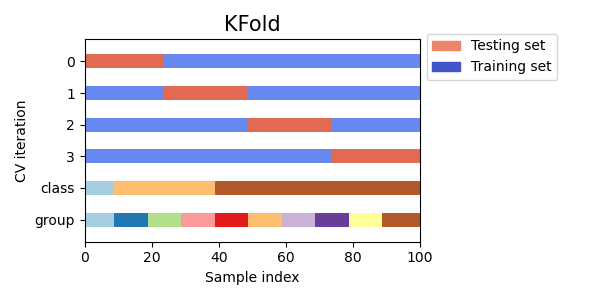

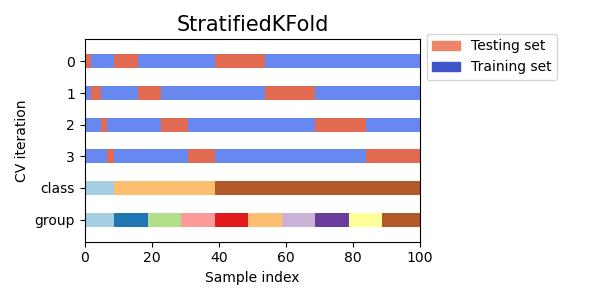

## A framework for evaluation (using Train-Validation-Test datasets)

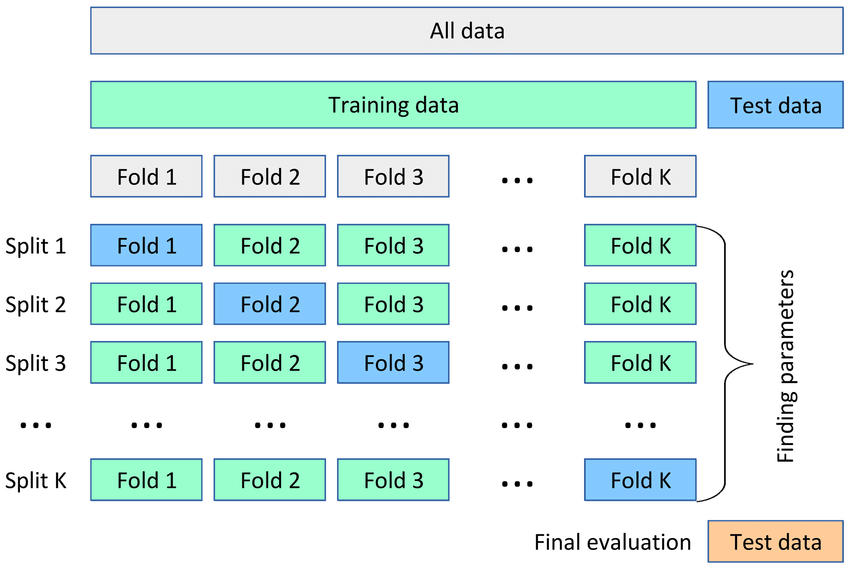

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer

def personilized_scoring(actual_classes, predictions):
    c_r = classification_report(actual_classes,  predictions,output_dict=True)
    return c_r['1']['precision']

# prepare the data
iris = pd.read_csv(r"iris.csv")
X = iris.iloc[:,0:4]
y = iris.iloc[:,-1]

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, stratify=y)
print("train: ")
print(train_y.value_counts(normalize=True))
print("test: ")
print(test_y.value_counts(normalize=True))
print('---------------------------------------------------------')

param_grid = {'C': [0.001,0.01,0.1,1],
             'penalty':['l2','l1'],
             'class_weight':['balanced',None]}  
grid = GridSearchCV(LogisticRegression(solver = 'liblinear'), param_grid,scoring='accuracy', cv = 7, verbose = 3) 
# grid = GridSearchCV(LogisticRegression(solver = 'liblinear'), param_grid,scoring=make_scorer(personilized_scoring), cv = 7, verbose = 3)
grid.fit(train_X, train_y)
print("The best parameters are: ")
print(grid.best_params_)
print('---------------------------------------------------------')

predict = grid.predict(test_X)

print(classification_report(test_y, predict))

train: 
Iris-versicolor    0.333333
Iris-virginica     0.333333
Iris-setosa        0.333333
Name: Species, dtype: float64
test: 
Iris-setosa        0.333333
Iris-virginica     0.333333
Iris-versicolor    0.333333
Name: Species, dtype: float64
---------------------------------------------------------
Fitting 7 folds for each of 16 candidates, totalling 112 fits
[CV 1/7] END C=0.001, class_weight=balanced, penalty=l2;, score=0.333 total time=   0.0s
[CV 2/7] END C=0.001, class_weight=balanced, penalty=l2;, score=0.400 total time=   0.0s
[CV 3/7] END C=0.001, class_weight=balanced, penalty=l2;, score=0.333 total time=   0.0s
[CV 4/7] END C=0.001, class_weight=balanced, penalty=l2;, score=0.333 total time=   0.0s
[CV 5/7] END C=0.001, class_weight=balanced, penalty=l2;, score=0.333 total time=   0.0s
[CV 6/7] END C=0.001, class_weight=balanced, penalty=l2;, score=0.333 total time=   0.0s
[CV 7/7] END C=0.001, class_weight=balanced, penalty=l2;, score=0.333 total time=   0.0s
[CV 1/7] END C

[CV 3/7] END C=1, class_weight=balanced, penalty=l1;, score=1.000 total time=   0.0s
[CV 4/7] END C=1, class_weight=balanced, penalty=l1;, score=0.933 total time=   0.0s
[CV 5/7] END C=1, class_weight=balanced, penalty=l1;, score=1.000 total time=   0.0s
[CV 6/7] END C=1, class_weight=balanced, penalty=l1;, score=0.800 total time=   0.0s
[CV 7/7] END C=1, class_weight=balanced, penalty=l1;, score=1.000 total time=   0.0s
[CV 1/7] END C=1, class_weight=None, penalty=l2;, score=0.933 total time=   0.0s
[CV 2/7] END C=1, class_weight=None, penalty=l2;, score=1.000 total time=   0.0s
[CV 3/7] END C=1, class_weight=None, penalty=l2;, score=1.000 total time=   0.0s
[CV 4/7] END C=1, class_weight=None, penalty=l2;, score=0.933 total time=   0.0s
[CV 5/7] END C=1, class_weight=None, penalty=l2;, score=1.000 total time=   0.0s
[CV 6/7] END C=1, class_weight=None, penalty=l2;, score=0.800 total time=   0.0s
[CV 7/7] END C=1, class_weight=None, penalty=l2;, score=1.000 total time=   0.0s
[CV 1/7]